# Candlestick Long Line Candle

https://www.investopedia.com/terms/l/long-legged-doji.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'BABA'
start = '2018-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100


## Candlestick with Long Line Candle

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,True
1,736697.0,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,False
2,736698.0,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,False
3,736699.0,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,True
4,736702.0,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,False


Text(0, 0.5, 'Price')

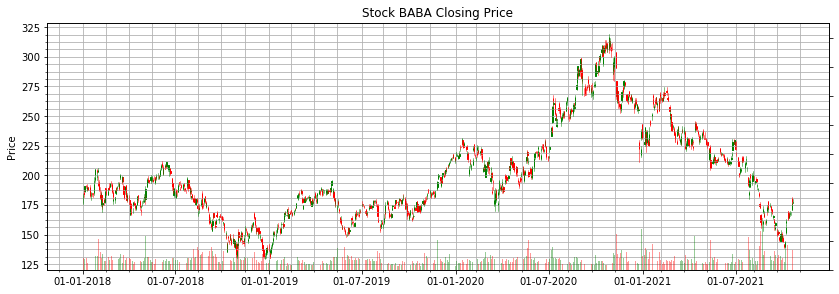

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
long_line_candle = talib.CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Close'])

long_line_candle = long_line_candle[long_line_candle != 0]

In [6]:
df['long_line_candle'] = talib.CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['long_line_candle'] !=0]

,Open,High,Low,Close,Adj Close,Volume,long_line_candle
Date,,,,,,,
2018-01-26,200.330002,205.229996,199.210007,205.220001,205.220001,23768600,100
2018-02-02,194.789993,195.679993,186.800003,187.309998,187.309998,32233900,-100
2018-02-06,174.720001,185.589996,174.169998,185.169998,185.169998,35804500,100
2018-02-14,179.220001,186.929993,178.899994,186.759995,186.759995,21047400,100
2018-02-27,192.589996,193.567001,187.210007,188.259995,188.259995,23218500,-100
...,...,...,...,...,...,...,...
2021-10-05,139.380005,143.830002,139.190002,143.139999,143.139999,14032100,100
2021-10-06,140.559998,144.891998,139.960007,144.100006,144.100006,14875900,100
2021-10-11,169.610001,169.800003,163.949997,163.949997,163.949997,42193600,-100


In [8]:
df['Adj Close'].loc[df['long_line_candle'] !=0]

Date
2018-01-26    205.220001
2018-02-02    187.309998
2018-02-06    185.169998
2018-02-14    186.759995
2018-02-27    188.259995
                 ...    
2021-10-05    143.139999
2021-10-06    144.100006
2021-10-11    163.949997
2021-10-13    167.399994
2021-10-19    177.000000
Name: Adj Close, Length: 186, dtype: float64

In [9]:
df['Adj Close'].loc[df['long_line_candle'] !=0].index

DatetimeIndex(['2018-01-26', '2018-02-02', '2018-02-06', '2018-02-14',
               '2018-02-27', '2018-03-07', '2018-03-13', '2018-03-20',
               '2018-03-21', '2018-03-23',
               ...
               '2021-09-02', '2021-09-10', '2021-09-14', '2021-09-24',
               '2021-09-27', '2021-10-05', '2021-10-06', '2021-10-11',
               '2021-10-13', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', length=186, freq=None)

In [10]:
long_line_candle

Date
2018-01-26    100
2018-02-02   -100
2018-02-06    100
2018-02-14    100
2018-02-27   -100
             ... 
2021-10-05    100
2021-10-06    100
2021-10-11   -100
2021-10-13    100
2021-10-19    100
Length: 186, dtype: int32

In [11]:
long_line_candle.index

DatetimeIndex(['2018-01-26', '2018-02-02', '2018-02-06', '2018-02-14',
               '2018-02-27', '2018-03-07', '2018-03-13', '2018-03-20',
               '2018-03-21', '2018-03-23',
               ...
               '2021-09-02', '2021-09-10', '2021-09-14', '2021-09-24',
               '2021-09-27', '2021-10-05', '2021-10-06', '2021-10-11',
               '2021-10-13', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', length=186, freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,long_line_candle
Date,,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,0
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,0
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,0
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,0
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,0
...,...,...,...,...,...,...,...
2021-10-15,166.990005,169.800003,165.434998,168.000000,168.000000,20747300,0
2021-10-18,166.580002,169.250000,166.580002,166.820007,166.820007,18945900,0
2021-10-19,170.600006,177.440002,170.449997,177.000000,177.000000,33538900,100


Text(0, 0.5, 'Price')

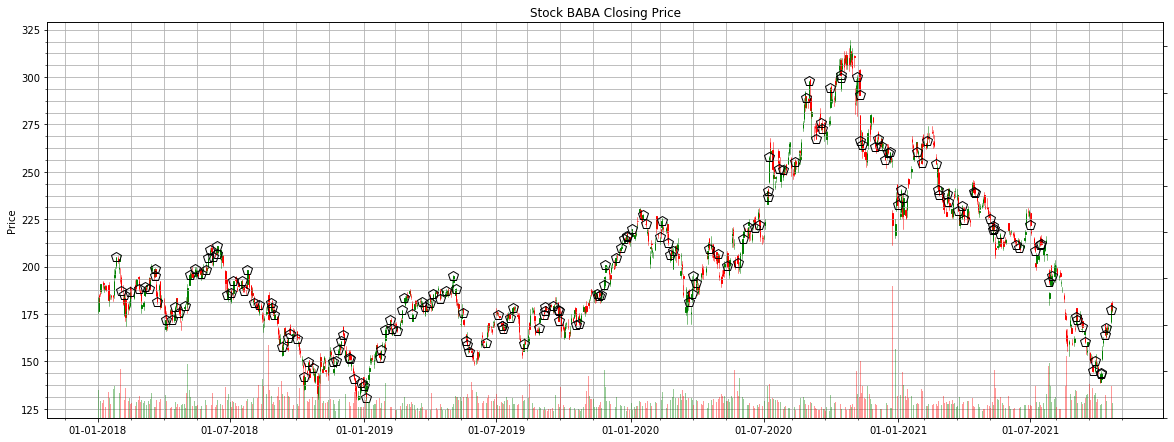

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['long_line_candle'] !=0].index, df['Adj Close'].loc[df['long_line_candle'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-10-01':'2021-10-22']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,long_line_candle,VolumePositive
0,738064.0,147.089996,148.449997,143.339996,144.199997,144.199997,20211000,0,False
1,738067.0,141.699997,141.899994,138.429993,139.630005,139.630005,25218500,0,False
2,738068.0,139.380005,143.830002,139.190002,143.139999,143.139999,14032100,100,True
3,738069.0,140.559998,144.891998,139.960007,144.100006,144.100006,14875900,100,True
4,738070.0,151.050003,158.289993,150.750000,156.000000,156.000000,46035900,0,True


Text(0, 0.5, 'Price')

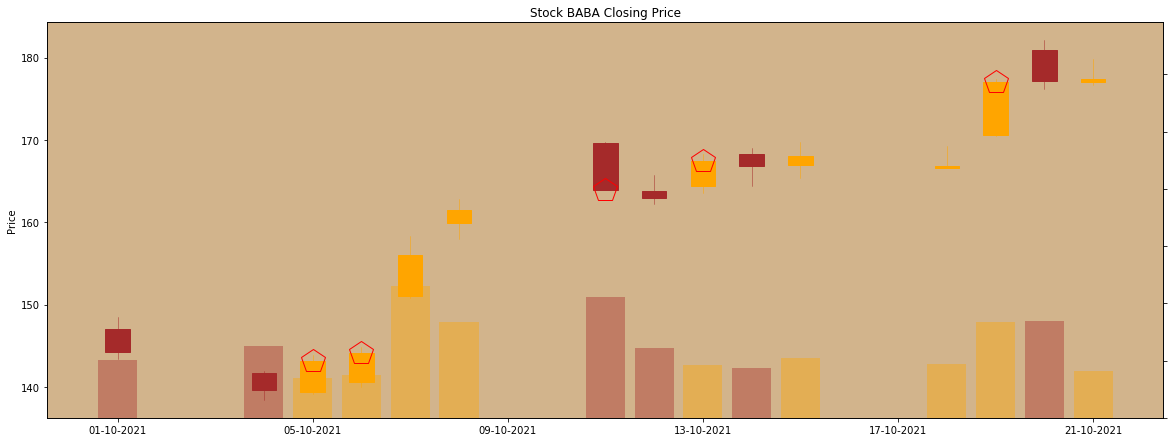

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('tan')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='orange', colordown='brown', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['long_line_candle'] !=0].index, df['Adj Close'].loc[df['long_line_candle'] !=0],
                'pr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'orange', False: 'brown'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

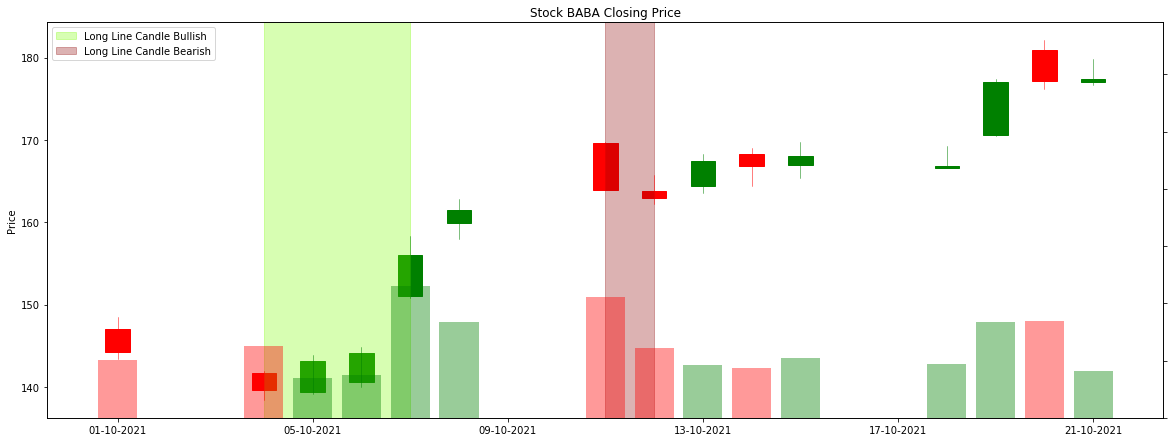

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,10,4)), date2num(datetime(2021,10,7)), 
           label="Long Line Candle Bullish",color="lawngreen", alpha=0.3)
ax.axvspan(date2num(datetime(2021,10,11)), date2num(datetime(2021,10,12)), 
           label="Long Line Candle Bearish",color="darkred", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')